In [2258]:
from sympy import *

---

***Datos Generales***

*Viga*

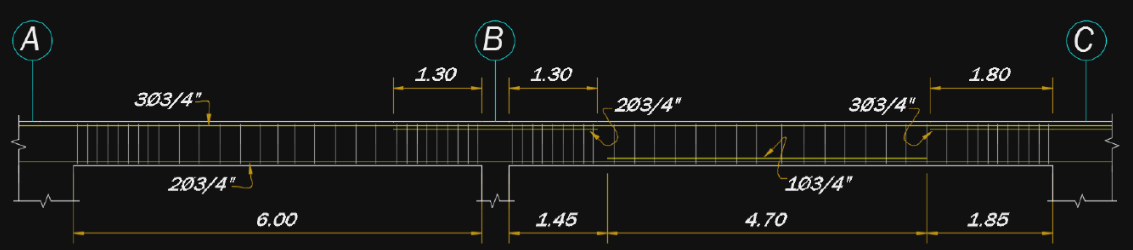

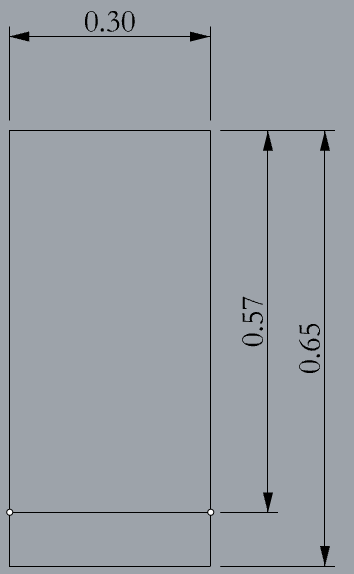

*idealizacion de la viga*

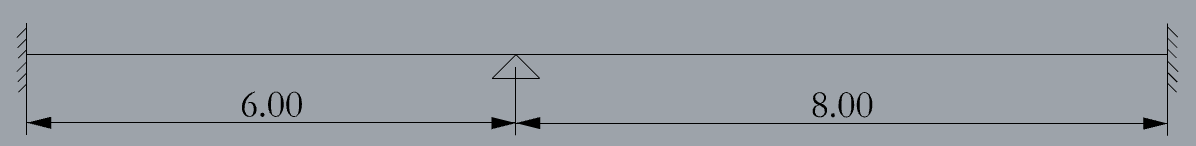

*Longitudes*

In [2259]:
b=.3 #m
h=.65 #m
hef=.57 #m

Lab=6 #m
Lbc=8 #m


*Propiedades del FRP y del Concreto*

In [2260]:
# Concreto
fc=280 #kg/cm2
Ec=15100*(fc)**.5 #kg/cm2
ecu=0.003 #Deformacion ultima del concreto
fy=4200 #kg/cm2
Es=2*10**6 #kg/cm2
esu=0.0021 #Deformacion ultima del acero
nrm=Es/Ec
# FRP : Son brindados por el fabricante Ojo !
tf=.001 #m : Espesor de la lamina de FRP
ffu=10054 #kg/cm2 : Tension de ruptura del FRP
efu=0.01 #Deformacion de ruptura del FRP
Efrp=976892 #kgf/cm2 Modulo de elasticidad del FRP

*Cargas*

In [2261]:
wd=.500 #kgf/m2 : Carga Muerta de la Viga
sco=.250 #kgf/m2 : Sobrecarga de uso de la Viga (Inicial)
scn=.650 #kgf/m2 : Sobrecarga de uso de la Viga (Nueva)
anch_t=5 #m : Ancho Tributario

---

***Analisis Estructural***

*Carga Ultima ***Actual****

In [2262]:
fdl=1.2
fll=1.6
wu=(fdl*wd+fll*sco)*anch_t
print ("wu=",round(wu,2),"tnf/m")

wu= 5.0 tnf/m


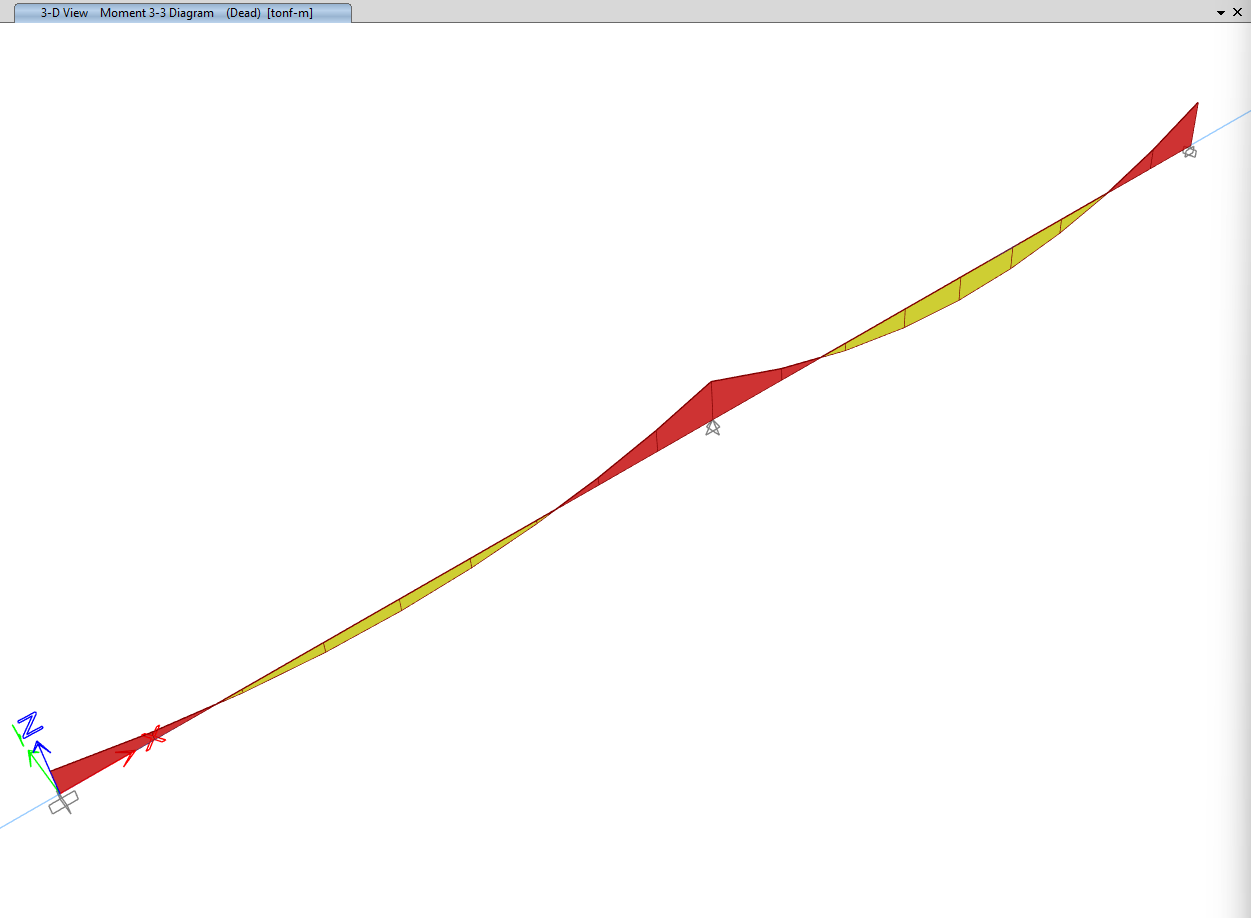

In [2263]:
Mwu1=[-11.67,-6.11,-21.66] # 1er Paño
Mwu2=[-21.66,14.51,-29.17] # 2do Paño

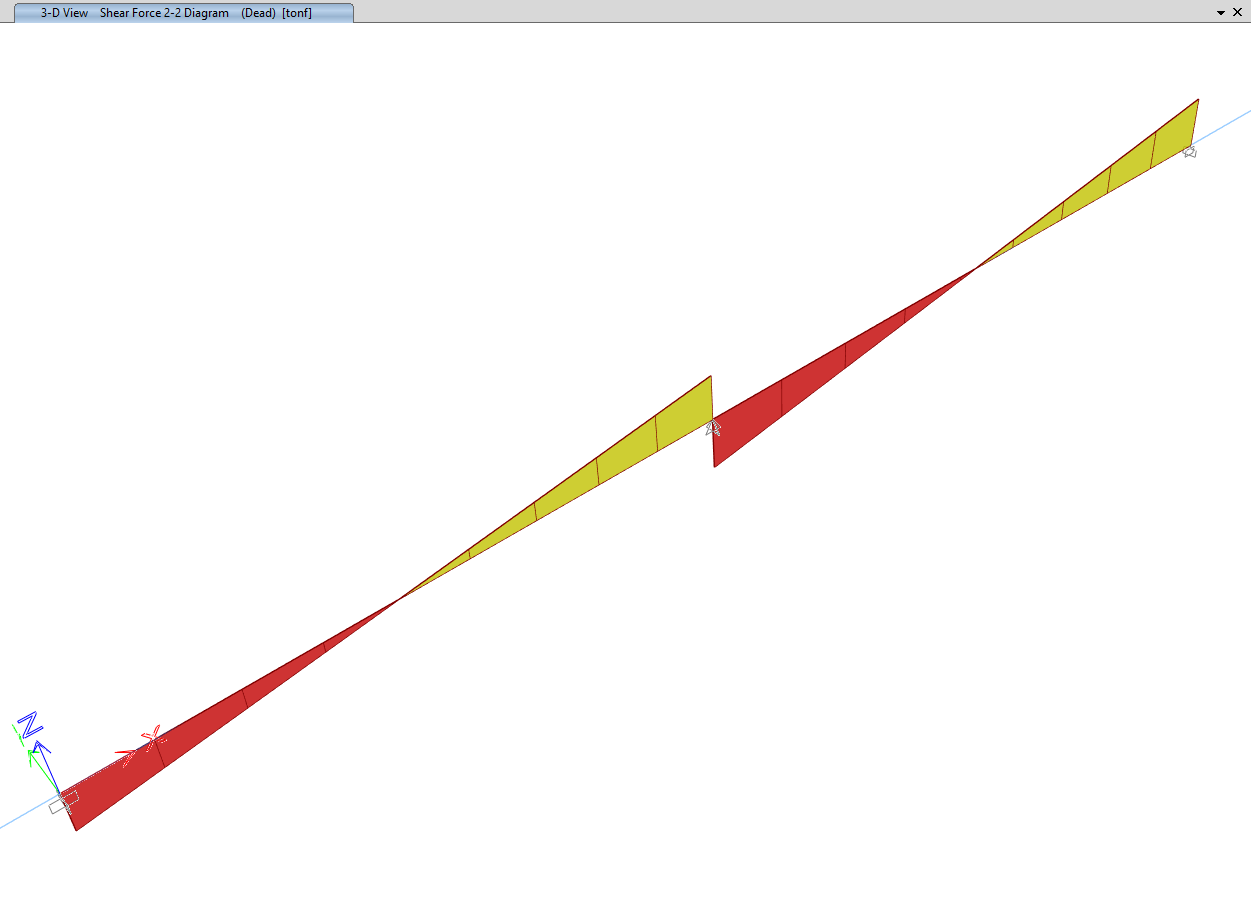

In [2264]:
Cwu1=[-13.33,16.67] # 1er Paño
Cwu2=[-19.06,20.94] # 2do Paño

*Sobrecarga Adicional*

In [2265]:
dwsc=fll*(scn-sco)*anch_t # Esto solamente afecta al 1er paño Ojo !
print ("dwsc=",round(dwsc,2),"tnf/m")

dwsc= 3.2 tnf/m


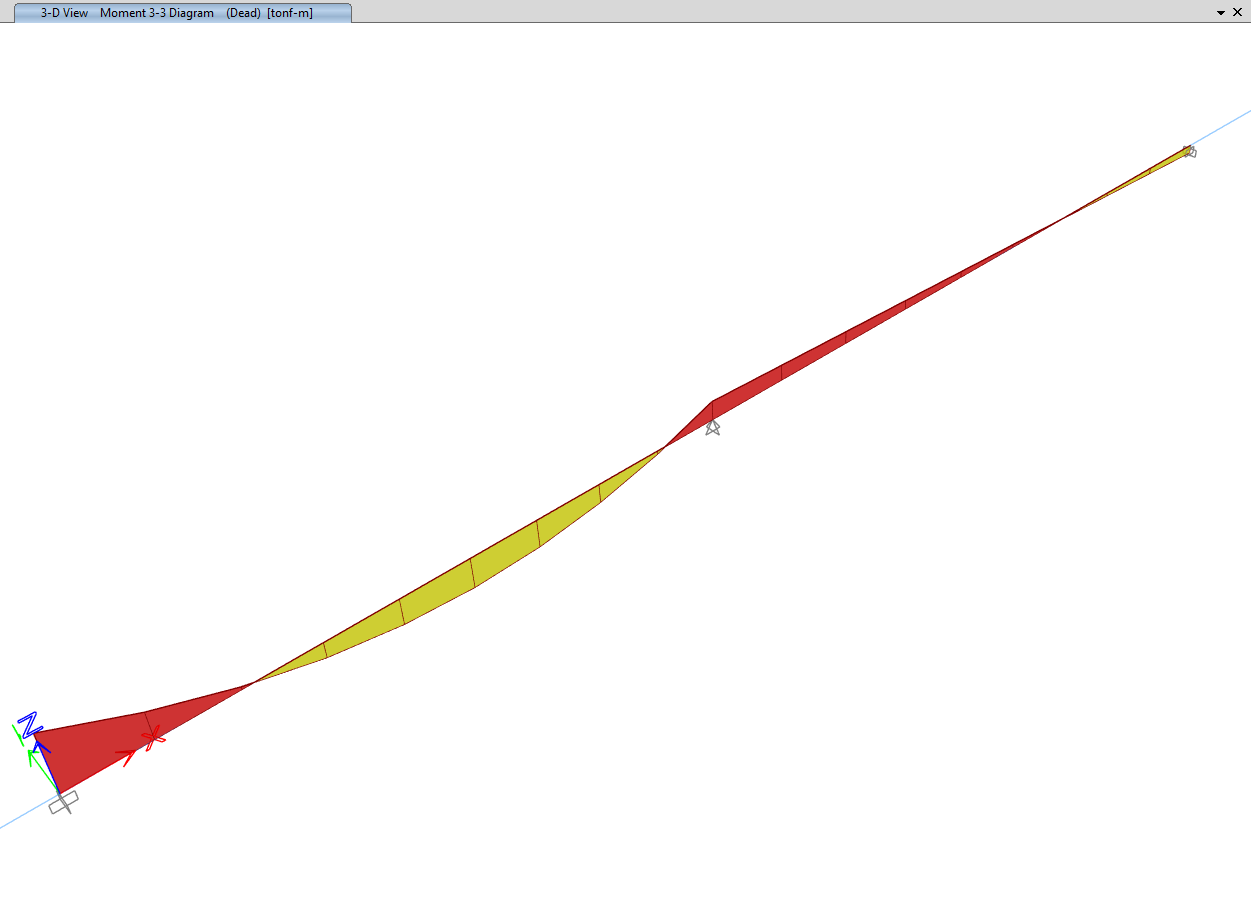

In [2266]:
Mdwsc1=[-12.34,6.45,-4,12] # 1er Paño
Mdwsc2=[-4.12,2.06] # 2do Paño

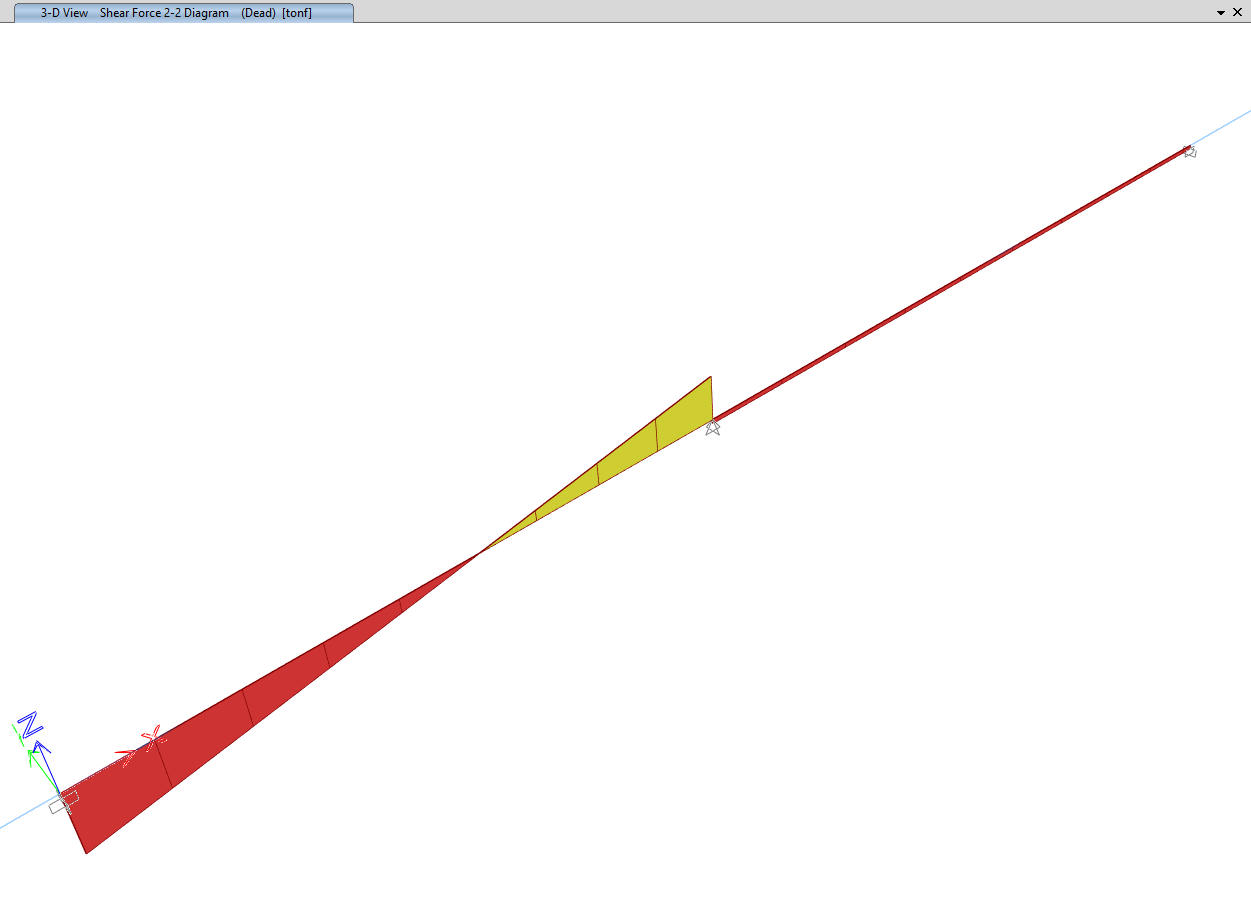

In [2267]:
Cdwsc1=[-10.97,8.23] # 1er Paño
Cdwsc2=[-0.77] # 2do Paño

---

*Solucion 1: Analizar el Momento en A*

*Carga Muerta (Sin Amplificar)*

In [2268]:
wdl=wd*anch_t #kgf/m : Carga Muerta de la Viga
print ("wdl=",round(wdl,2),"tnf/m")

wdl= 2.5 tnf/m


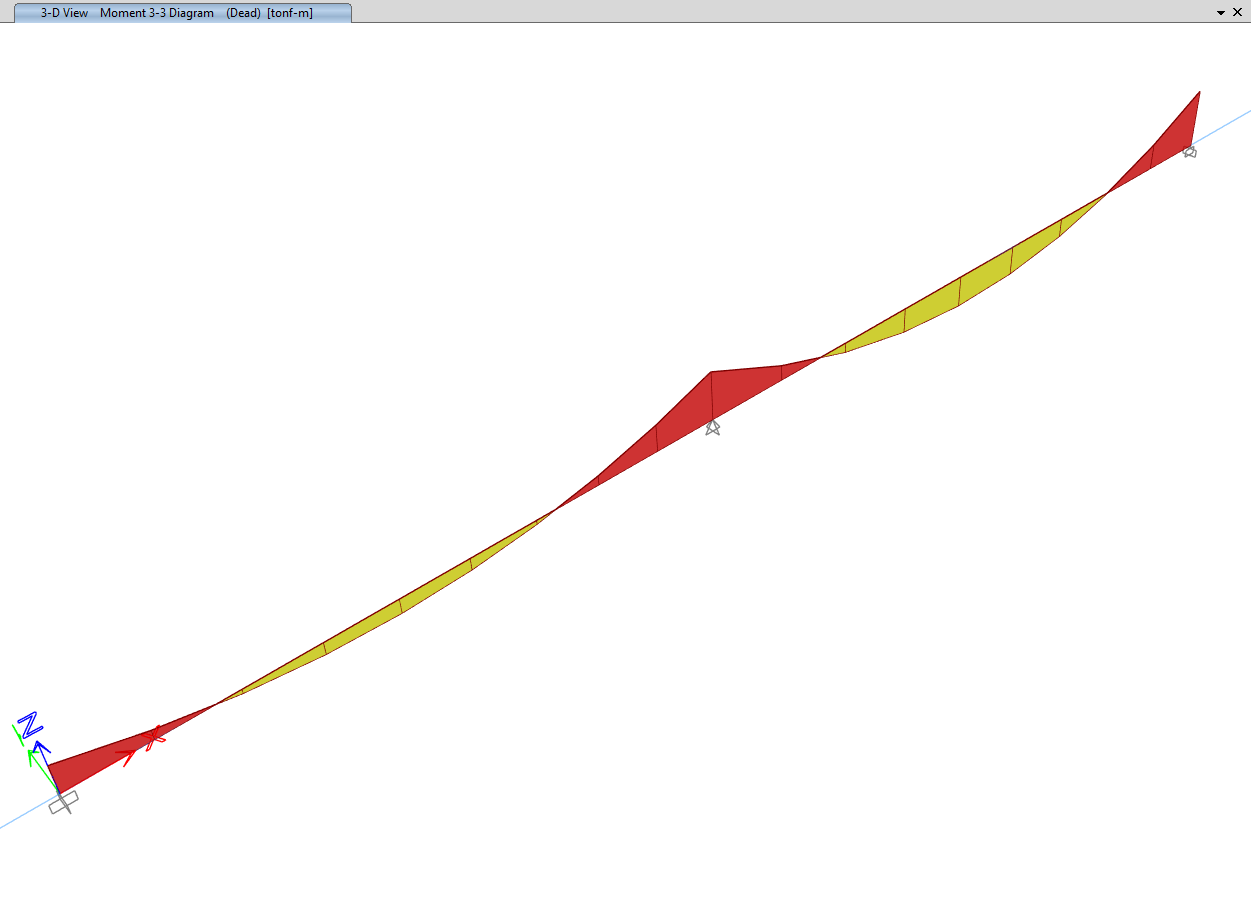

In [2269]:
Mwdl=[-5.84,3.05,-10.83] # 1er Paño

*Momento Carga Viva (Sin Amplificar)*

In [2270]:
wll=sco*anch_t #tnf/m : Carga Viva de la Viga
print ("wll=",round(wll,2),"tnf/m")

wll= 1.25 tnf/m


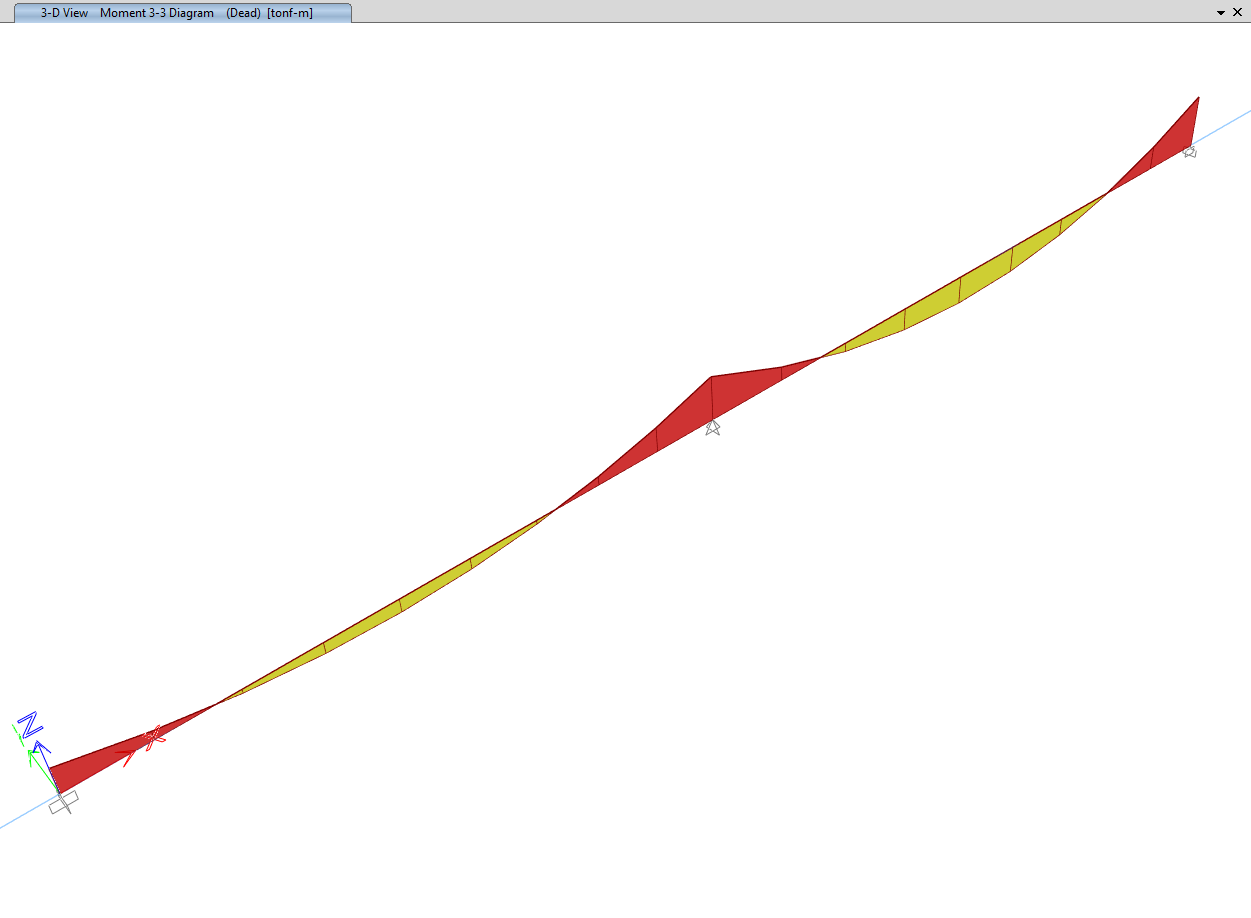

In [2271]:
Mwll=[-2.92,1.53,-5.42] # 1er Paño

*Incremento de Carga Viva (Sin amplificar)*

In [2272]:
wdsc=(scn-sco)*anch_t #tnf/m : Diferencia de Carga Viva : Ojo el Incremento es solo en el Paño 1 !
print ("wdsc=",round(wdsc,2),"tnf/m")

wdsc= 2.0 tnf/m


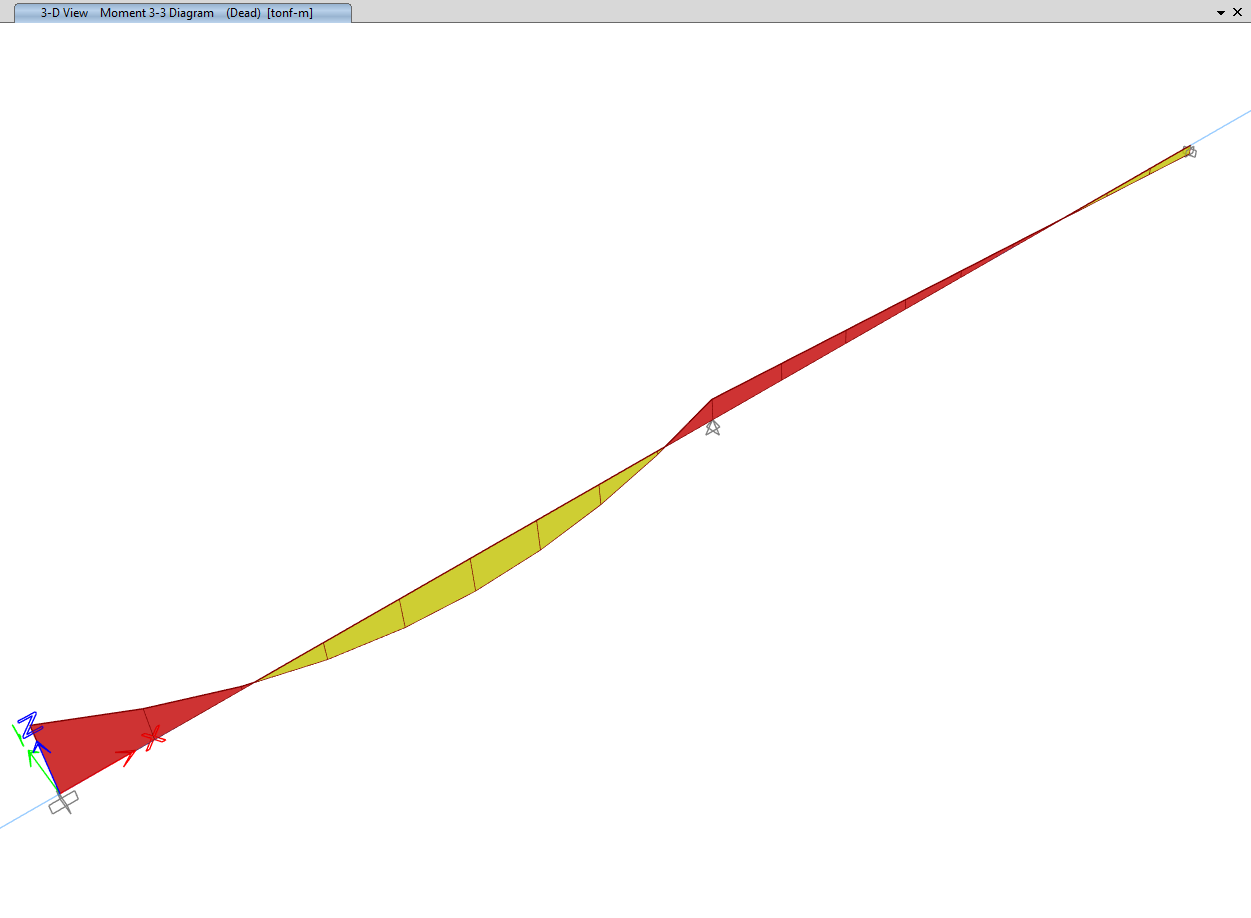

In [2273]:
Mdwsc11=[-7.71,4.03,-2.57] # 1er Paño

*Cargas de Servicio*

In [2274]:
wcs1=(wd+scn)*anch_t #tnf/m : Carga de Servicio de la Viga para el 1er Paño
wcs2=(wd+sco)*anch_t #tnf/m : Carga de Servicio de la Viga para el 2do Paño
print ("wcs1=",round(wcs1,2),"tnf/m")
print ("wcs2=",round(wcs2,2),"tnf/m")

wcs1= 5.75 tnf/m
wcs2= 3.75 tnf/m


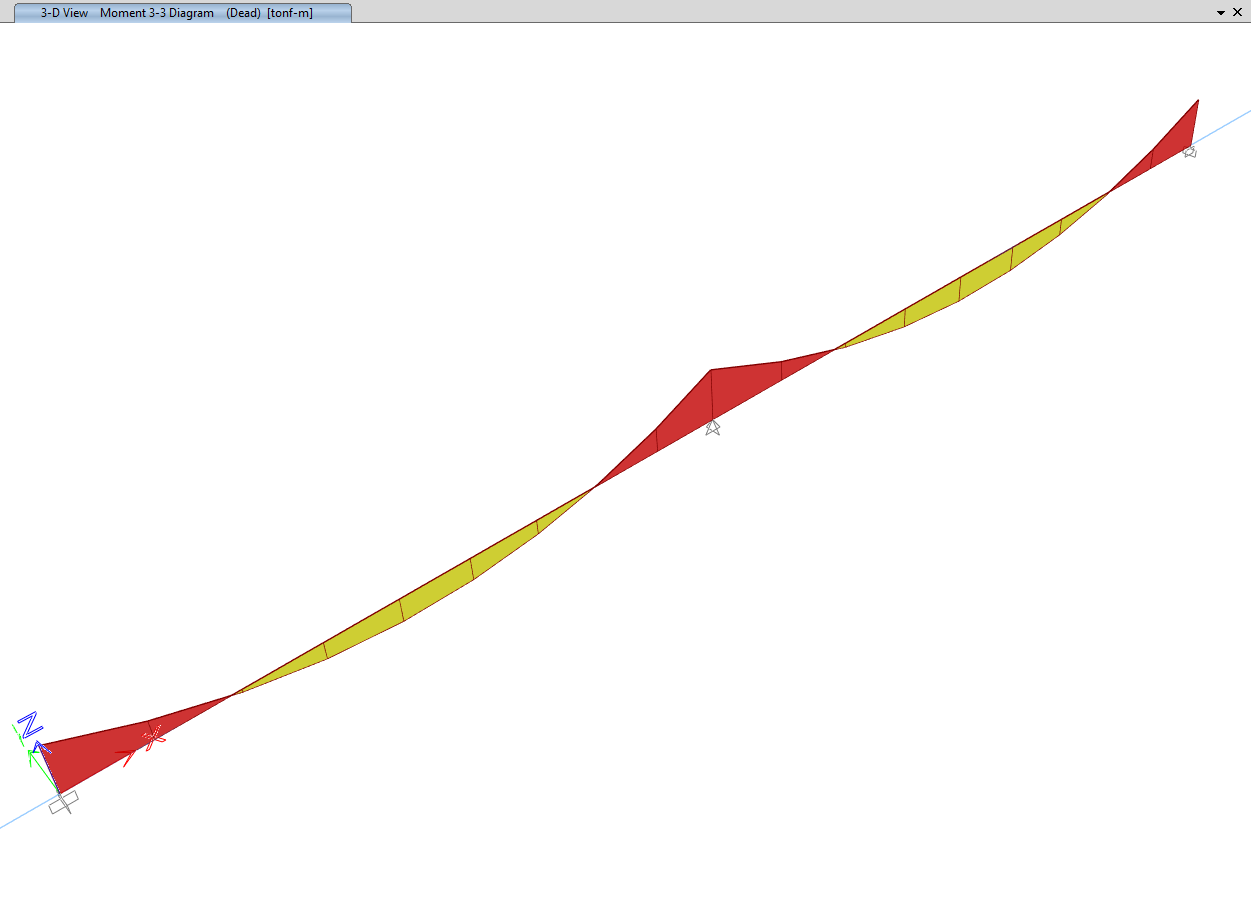

In [2275]:
Mcs=[-16.47,8.04,-18.82] # 1er Paño

*Limite sin refuerzo*

In [2276]:
wlsr1=(1.1*wd+0.75*scn)*anch_t #tnf/m : Carga de Servicio de la Viga para el 1er Paño
wlsr2=(1.1*wd+0.75*sco)*anch_t #tnf/m : Carga de Servicio de la Viga para el 2do Paño
print ("wlsr1=",round(wlsr1,2),"tnf/m")
print ("wlsr2=",round(wlsr2,2),"tnf/m")

wlsr1= 5.19 tnf/m
wlsr2= 3.69 tnf/m


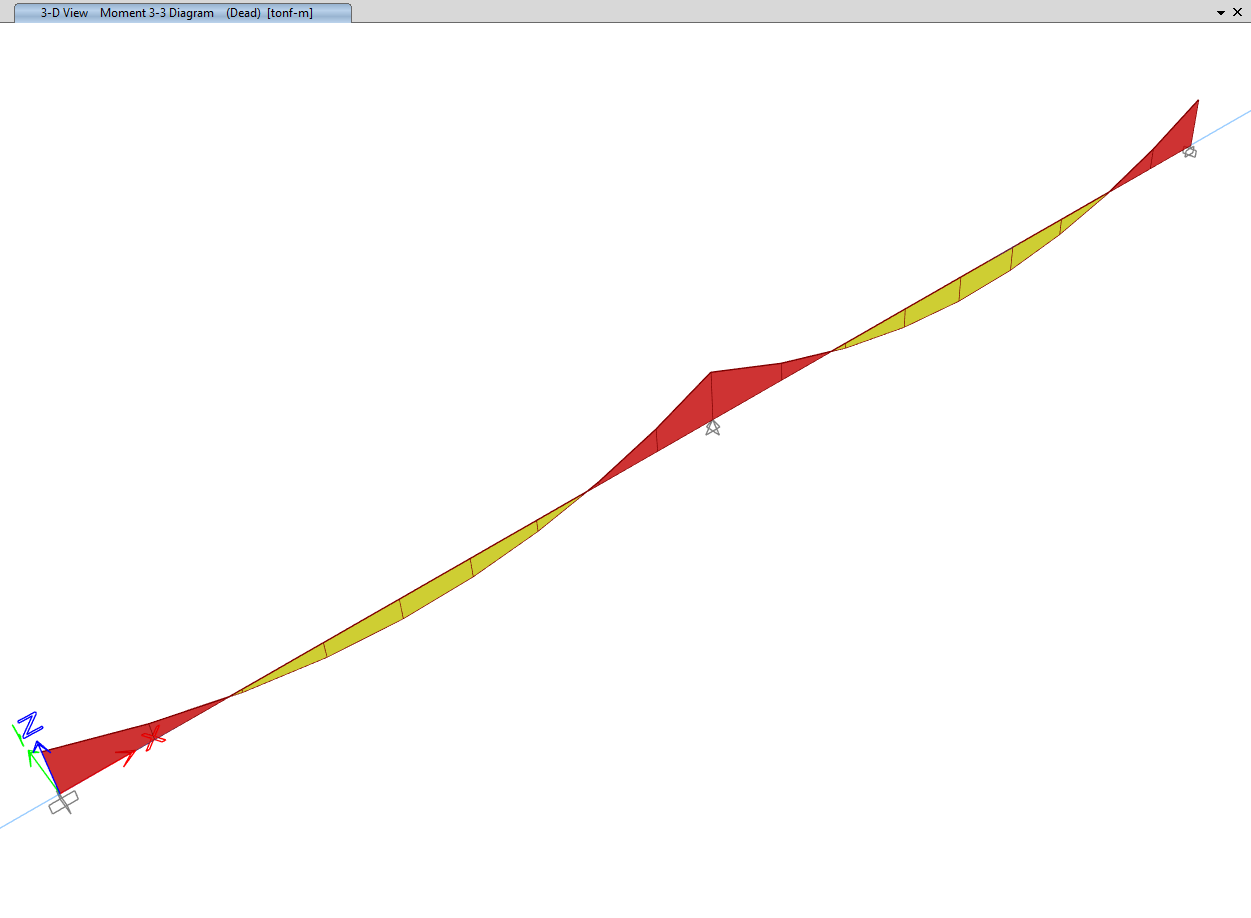

In [2277]:
Mwslr=[-14.4,7.1,-17.92] # 1er Paño

*Carga Ultima Proyectada*

In [2278]:
wcup1=(1.2*wd+1.6*scn)*anch_t #tnf/m : Carga Ultima Proyectada para el 1er Paño
wcup2=(1.2*wd+1.6*sco)*anch_t #tnf/m : Carga Ultima Proyectada para el 2do Paño
print ("wcup1=",round(wcup1,2),"tnf/m")
print ("wcup2=",round(wcup2,2),"tnf/m")

wcup1= 8.2 tnf/m
wcup2= 5.0 tnf/m


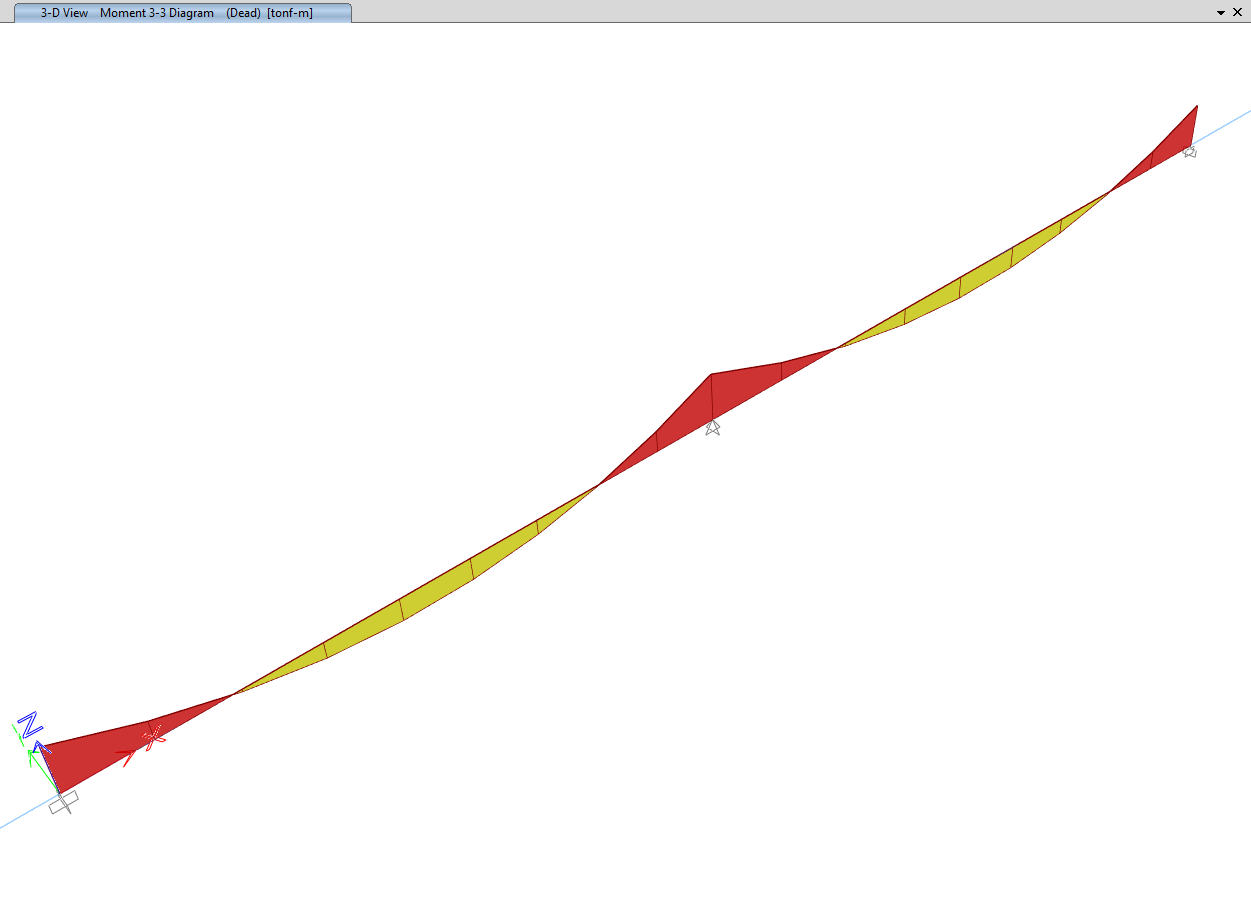

In [2279]:
Mcup=[-24.01,11.65,-25.78] # 1er Paño

*Momento Nominal (Segun Teodoro Harmsen)*

In [2280]:
n=3
diam=3/4 # pulg
Adiam1=pi*(diam*2.54)**2/4 # cm2
As1=(n*Adiam1)*10**-4 # m2
rho1=As1/(b*hef) # Cuantia de Refuerzo
w=rho1*fy/fc
phi=0.9 # Coeficiente de Reduccion para Flexion
phiMn1=phi*(b*hef**2*w*fc*10*(1-0.59*w)) #tnf-m
print ("phiMn1=",round(phiMn1,2),"tnf-m")

n=2
diam=3/4 # pulg
Adiam2=pi*(diam*2.54)**2/4 # cm2
As2=(n*Adiam2)*10**-4 # m2
rho2=As2/(b*hef) # Cuantia de Refuerzo
w=rho2*fy/fc
phiMn2=phi*(b*hef**2*w*fc*10*(1-0.59*w)) #tnf-m
print ("phiMn2=",round(phiMn2,2),"tnf-m")

n=5
diam=3/4 # pulg
Adiam3=pi*(diam*2.54)**2/4 # cm2
As3=(n*Adiam3)*10**-4 # m2
rho3=As3/(b*hef) # Cuantia de Refuerzo
w=rho3*fy/fc
phiMn3=phi*(b*hef**2*w*fc*10*(1-0.59*w)) #tnf-m
print ("phiMn3=",round(phiMn3,2),"tnf-m")

phiMn1= 17.61 tnf-m
phiMn2= 11.92 tnf-m
phiMn3= 28.44 tnf-m


---

***1er Paso***

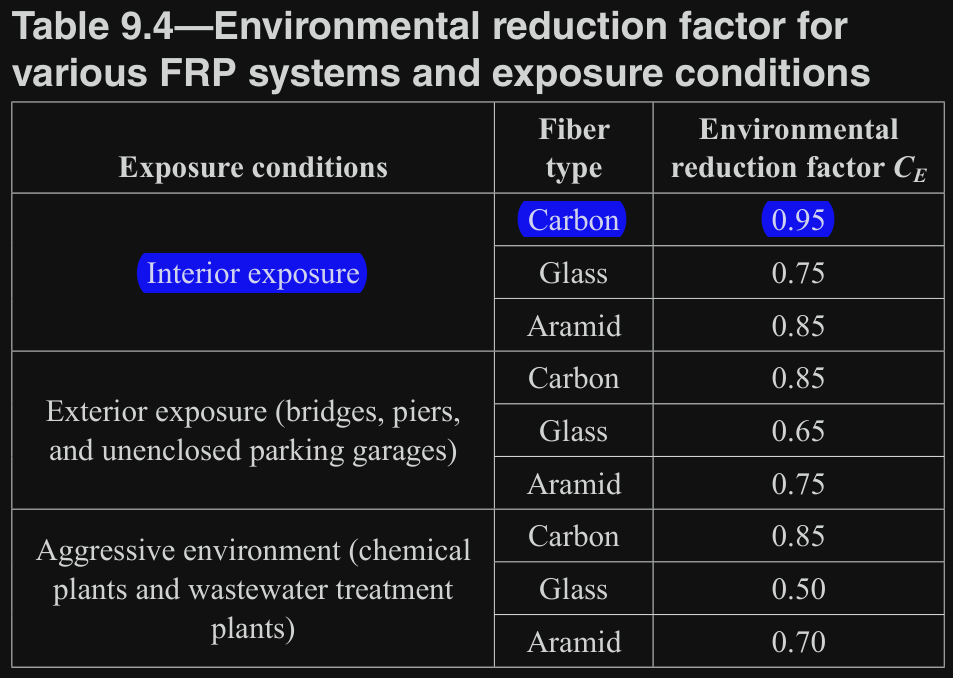

In [2281]:
CE=0.95
ffuef=CE*ffu
efuef=CE*efu
print ("ffuef=",round(ffuef,2),"kg/cm2")
print ("efuef=",round(efuef,2))

ffuef= 9551.3 kg/cm2
efuef= 0.01


***2 Paso***

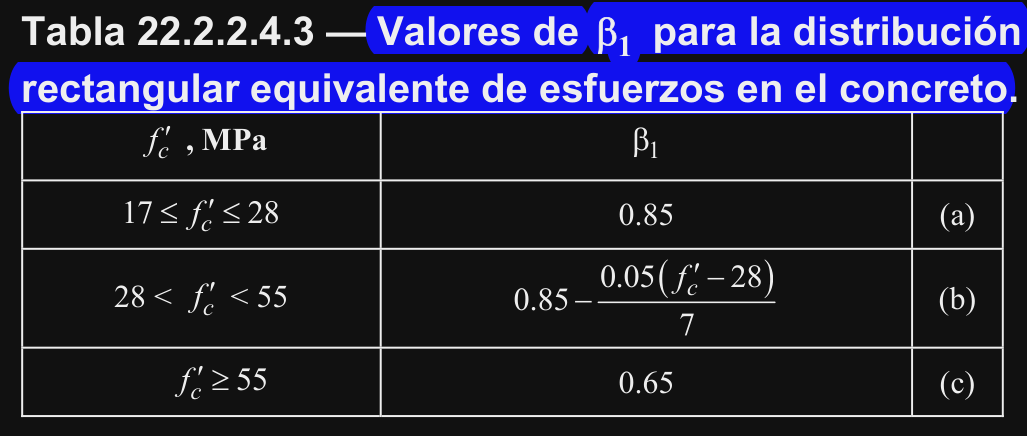

In [2282]:
beta1=0.85
rhob=0.85*fc*beta1/fy*(6117/(fy+6117)) # Segun Teodoro Harmsen es la Cuantia Balanceada
print ("rhob=",round(rhob,5))

rhob= 0.02856


In [2283]:
nf=1# Numero de Capas de FRP
bf=.25 #m : Ancho de la Lamina de FRP
Af=nf*bf*tf #m2 : Area de FRP
rhof=Af/(b*hef) # Cuantia de FRP
print ('Af =',round(Af,4),'m2')
print ('rhof =',round(rhof,4))

Af = 0.0003 m2
rhof = 0.0015


***3 Paso***

In [2284]:
k=-rho1*nrm+sqrt((rho1*nrm)**2+2*rho1*nrm)
Icr=b*(k*hef)**3/3+nrm*As1*(hef-k*hef)**2
print ('k =',round(k,2))
print ("Icr=",round(Icr,5),"m4")

k = 0.24
Icr= 0.00153 m4


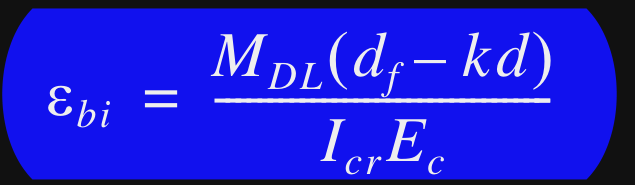

In [2285]:
df=h+tf/2 #m : Distancia al centroide de la fibra
ebi=-Mwdl[0]*(df-k*hef)/(Icr*Ec*10) #m : Deformacion por Flexion
print ("ebi=",round(ebi,5))

ebi= 0.00077


***4 Paso***

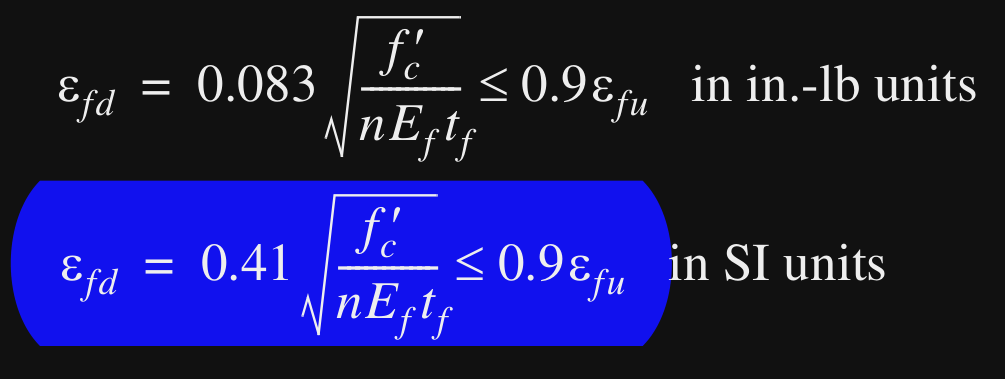

In [2286]:
efd=.41*(fc/(nrm*Efrp*tf*100))**.5
if efd<0.9*efuef:
    print ('efd < 0.9*efuef','::',round(efd,5),'<',round(0.9*efuef,5))
    print ('OK')
else:
    print ('efd > 0.9*efuef','::',round(efd,5),'>',round(0.9*efuef,5))
    print ('NO OK')

efd < 0.9*efuef :: 0.0078 < 0.00855
OK


***5 Paso***

*Asumir un valor de c*

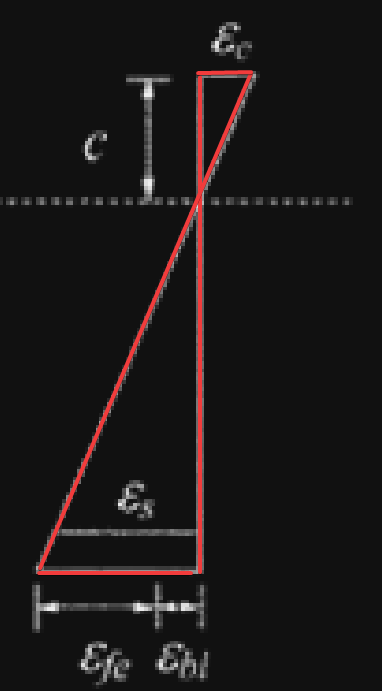

***6 Paso***

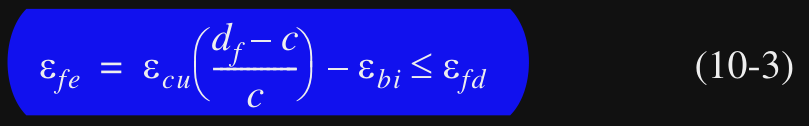

In [2287]:
c=0.1056 #m : Distancia del eje neutro

In [2288]:
# Suponemos falla del concreto, entonces ecu=0.003
efe=ecu*(df-c)/c-ebi
if efe>efd:
    print ('efe > efd','::',round(efe,5),'>',round(efd,5))
    print ('El concreto aun no ha fallado')
    efe=efd
    ec=(efe+ebi)*c/(df-c)
    print ('El valor ec =',round(ec,5),'::','efe=efd')
else:
    print ('efe < efd','::',round(efe,5),'<',round(efd,5))
    print ('El concreto ha fallado')
    ec=ecu
    print ('El valor ec =',round(ec,5),'::','efe=efd')

efe > efd :: 0.01471 > 0.0078
El concreto aun no ha fallado
El valor ec = 0.00166 :: efe=efd


***7 Paso***

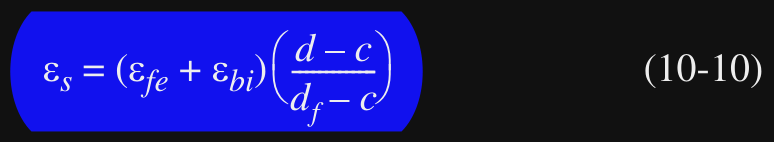

In [2289]:
es=(efe+ebi)*(hef-c)/(df-c)
if es>esu:
    print ('es > esu','::',round(es,5),'>',round(esu,5))
    print ('El acero ha fallado')
    print ('fs=fy')
    fs=fy*10

es > esu :: 0.00731 > 0.0021
El acero ha fallado
fs=fy


In [2290]:
ffe=Efrp*10*efe
if ffe>ffuef*10:
    print ('ffe > ffuef','::',round(ffe,2),'>',round(ffuef*10,2))
    print ('El FRP ha fallado')
    print ('ffe=ffuef')
    ffe=ffuef
else:
    print ('ffe < ffuef','::',round(ffe,2),'<',round(ffuef*10,2))
    print ('El FRP aun no ha fallado')

ffe < ffuef :: 76216.52 < 95513.0
El FRP aun no ha fallado


***8 Paso***

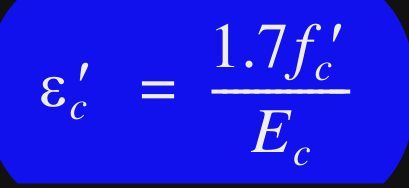

In [2291]:
ecef=1.7*fc/Ec
beta1=(4*ecef-ec)/(6*ecef-2*ec)
alpha1=(3*ecef*ec-ec**2)/(3*beta1*ecef**2)
print ('ecef =',round(ecef,5))
print ('beta1 =',round(beta1,4))
print ('alpha1 =',round(alpha1,4))

ecef = 0.00188
beta1 = 0.7361
alpha1 = 0.8461


***9 Paso***

In [2292]:
cc=alpha1*fc*10*beta1*c*b
Ts=As1*fs
Tf=Af*ffe
print ('cc =',round(cc,2),'tnf')
print ('Ts =',round(Ts,2),'tnf')
print ('Tf =',round(Tf,2),'tnf')
print ('Error =',round(cc-(Ts+Tf),2),'tnf')

cc = 55.24 tnf
Ts = 35.91 tnf
Tf = 19.05 tnf
Error = 0.28 tnf


---

***SOLVE***

---

In [2294]:
b=30
As=3*2.85
k=.24
d=57
n=7.92
Icr=b*(k*d)**3/3+n*As*(d-k*d)**2
print ("Icr =",round(Icr,2))

Icr = 152678.44


In [2295]:
fc=280
Ec=15100*(fc)**.5
df=65+0.1/2
Mdl=6.25*10**5
eps_bi=Mdl*(df-k*d)/(Icr*Ec)
print ("eps_bi =",round(eps_bi,6))

eps_bi = 0.000832


In [2296]:
Ef=976892 # kgf/cm2
tf=.1 # cm
eps_fd=.41*(fc/(n*Ef*tf))**.5
print ("eps_fd =",round(eps_fd,6))

eps_fd = 0.0078


In [2297]:
c=symbols('c')

eps_cu=0.003
eps_fe=eps_cu*(df-c)/c-0.0008
f_fe=Ef*eps_fe

alpha=0.85
beta=0.85
b=30
fs=4200
Af=2.5

solve(Eq(alpha*fc*beta*b*c,As*fs+Af*f_fe),c)

[-6.93537515208806, 11.3231698464364]

In [2298]:
eps_c=symbols('eps_c')
solve(Eq(eps_c*(65.05-10.63)/10.63-0.0008,0.015),eps_c)

[0.00308625505328923]

In [2299]:
round((0.0095+0.0008)*10.63/(65.05-10.63),5)

0.00201

In [2300]:
0.0018*(65.05-10.63)/10.63-0.0008

0.008415051740357476

In [2301]:
(0.00855+0.0008)*10.63/(65.05-10.63)

0.0018263597941933119

In [2302]:
b=25 #cm
As=3*2.85 #cm2
k=.24
n=7.92
d=57 #cm
df=65+0.1/2
Ef=976892
nf=Ef/(15100*280**.5)
Af=2.5
As_ef=2*2.85 # cm2 Acero Inferior
d_ef=8 # cm = .65-.57
Icr=b*(k*d)**3/3+n*As*(d-k*d)**2+n*As_ef*(k*d-d_ef)**2+nf*Af*(df-k*d)**2
print ("Icr =",round(Icr,2))

Icr = 175374.48


In [2303]:
Ms=16.65*10**5 # kgf-cm
fss=n*Ms*(d-k*d)/Icr
print ("fss =",round(fss,2))

fss = 3257.33


In [2304]:
eps_bi=0.0008
ffs=nf*Ms*(df-k*d)/Icr-eps_bi*Ef
print ("ffs =",round(ffs,2))

ffs = 1104.08


In [2305]:
fcs=Ms*k*d/Icr
print ("fcs =",round(fcs,2))

fcs = 129.88


---